In [179]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

import warnings
warnings.filterwarnings('ignore')

data_dir = "/data/projects/robin/xenium_outs/"
!ls {data_dir}

QC_ridge_plot_fromIntegratedObj.pdf
firstRun_output-XETG00088__0011455__Region_1__20230922__152322.h5ad
firstRun_output-XETG00088__0011467__Region_1__20230922__152322.h5ad
output-XETG00088__0011186__Region_1__20240124__111313.h5ad
output-XETG00088__0011216__Region_1__20240130__161548.h5ad
output-XETG00088__0011284__Region_1__20240206__171802.h5ad
output-XETG00088__0011287__Region_1__20240206__171802.h5ad
output-XETG00088__0011546__Region_1__20240130__161548.h5ad
output-XETG00088__0011695__Region_1__20240202__104242.h5ad
output-XETG00088__0011707__Region_1__20240202__104242.h5ad
output-XETG00088__0011762__Region_1__20240124__111313.h5ad
output-XETG00088__0018723__Region_1__20240216__134551.h5ad
output-XETG00088__0018775__Region_1__20240216__134551.h5ad
s03_QC_ridgePlot_from_Integrated_h5ad.ipynb


In [180]:
slide2file = {
    1 : 'output-XETG00088__0011762__Region_1__20240124__111313.h5ad',
    2 : 'output-XETG00088__0011186__Region_1__20240124__111313.h5ad',
    3 : 'output-XETG00088__0011546__Region_1__20240130__161548.h5ad',
    4 : 'output-XETG00088__0011216__Region_1__20240130__161548.h5ad',
    5 : 'output-XETG00088__0011707__Region_1__20240202__104242.h5ad',
    6 : 'output-XETG00088__0011695__Region_1__20240202__104242.h5ad',
    7 : 'output-XETG00088__0011284__Region_1__20240206__171802.h5ad',
    8 : 'output-XETG00088__0011287__Region_1__20240206__171802.h5ad',
}

In [188]:
# Read Data
slide = 7
adata = sc.read_h5ad(filename = data_dir + slide2file[slide])
adata.obs.set_index(adata.obs_names, inplace=True)
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()
adata.obs

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan,x_centroid,y_centroid,cell_area
cell_CR85333614e-1,1149.238485,599.156580,22.760980,2,20,1.3050,6.324,15.33000,0.9763,0.94800,1.000000,50,1149.238485,599.156580,15.33000
cell_CR85333614e-2,1576.728023,926.433954,23.000903,2,190,1.7030,1.974,111.60000,0.9973,0.96440,0.989474,50,1576.728023,926.433954,111.60000
cell_CR85333614e-3,1585.860201,916.280529,21.610402,2,79,0.7335,3.085,107.70000,0.9960,0.88030,1.000000,50,1585.860201,916.280529,107.70000
cell_CR85333614e-4,1600.064496,902.904764,21.110354,2,156,0.6900,1.816,226.10000,0.9950,0.94490,0.993590,50,1600.064496,902.904764,226.10000
cell_CR85333614e-5,1632.968543,874.599268,21.494649,2,86,0.8440,1.963,101.90000,0.9960,0.87070,0.988372,50,1632.968543,874.599268,101.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR85333614e-473953,6178.349700,19899.922500,20.901076,2,4,0.5360,5.786,7.46200,0.9990,0.03000,1.000000,2,6178.349700,19899.922500,7.46200
cell_CR85333614e-473955,6577.950333,18912.430333,21.807371,4,3,2.2460,1.804,1.33600,0.9997,0.02667,1.000000,2,6577.950333,18912.430333,1.33600
cell_CR85333614e-473958,4036.242825,3046.297350,18.998530,2,4,4.8980,30.570,0.81660,0.9995,0.02000,0.750000,1,4036.242825,3046.297350,0.81660
cell_CR85333614e-473961,7212.399533,6276.865900,22.332684,1,3,44.0700,3.146,0.06807,0.9974,0.02000,1.000000,1,7212.399533,6276.865900,0.06807


In [192]:
def bound_check(x, x0, x1):
    if x0 == None:
        result = (x < x1)
    elif x1 == None:
        result = (x > x0)
    else:
        result = (x > x0) and (x < x1)
    return result

xy_check = lambda x, y : (bound_check(x, x0, x1) and bound_check(y, y0, y1))


bounds_dict = {f'slide_{i}':dict() for i in slide2file.keys()}

bounds_dict['slide_1']['label'] = {'x1':'ctrl', 'x2':'ctrl', 'x3':'anca', 'x4':'anca', 
                                   'x5':'gbm',  'x6':'anca', 'x7':'sle',  'x8':'sle'}
bounds_dict['slide_1']['bounds'] = {
    'x1' : (6000, None, 16000, None),
    'x2' : (None, 6000, 16000, None),
    'x3' : (6000, None, 11000, 15000),
    'x4' : (None, 6000, 11000, 16000),
    'x5' : (9000, None, 4000, 10000),
    'x6' : (2000, 9000, 4000, 9000),
    'x7' : (6000, None, None, 4000),
    'x8' : (None, 6000, None, 3800),
}

bounds_dict['slide_2']['label'] = {'x1':'ctrl', 'x2':'ctrl', 'x3':'anca', 'x4':'anca', 
                                   'x5':'gbm',  'x6':'anca', 'x7':'sle',  'x8':'sle'}
bounds_dict['slide_2']['bounds'] = {
    'x1' : (5000, None, 16000, None),
    'x2' : (None, 5000, 16000, None),
    'x3' : (4000, None, 11000, 15000),
    'x4' : (None, 4000, 11000, 16000),
    'x5' : (6000, None, 4000, 10000),
    'x6' : (None, 6000, 4000, 9000),
    'x7' : (5000, None, None, 4000),
    'x8' : (None, 5000, None, 3800),
}

bounds_dict['slide_3']['label'] = {'x9':'ctrl', 'x10':'ctrl', 'x11':'anca', 'x12':'anca', 
                                   'x13':'gbm', 'x14':'anca', 'x15':'sle',  'x16':'sle'}
bounds_dict['slide_3']['bounds'] = {
    'x9'  : (5300, None, 15000, None),
    'x10' : (None, 5300, 16000, None),
    'x11' : (3000, None, 9800, 15000),
    'x12' : (None, 3000, 9800, 15000),
    'x13' : (5000, None, 4800, 9700),
    'x14' : (None, 5000, 4800, 9800),
    'x15' : (4900, None, None, 4700),
    'x16' : (None, 4300, None, 4700),
}

bounds_dict['slide_4']['label'] = {'x17':'anca', 'x18':'anca', 'x19':'anca', 'x20':'anca', 
                                   'x21':'gbm',  'x22':'sle', 'x23':'sle',  'x24':'sle'}
bounds_dict['slide_4']['bounds'] = {
    'x17' : (4000, None, 16500, None),
    'x18' : (None, 4000, 17000, None),
    'x19' : (4800, None, 11800, 16000),
    'x20' : (None, 4800, 12000, 17000),
    'x21' : (3500, None, 5700, 11500),
    'x22' : (None, 3500, 6000, 11000),
    'x23' : (5500, None, None, 4000),
    'x24' : (None, 5500, None, 5700),
}

bounds_dict['slide_5']['label'] = {'x25':'anca', 'x26':'anca', 'x27':'anca', 'x28':'anca', 
                                   'x29':'gbm',  'x30':'sle',  'x31':'sle',  'x32':'sle'}
bounds_dict['slide_5']['bounds'] = {
    'x25' : (5100, None, 14800, None),
    'x26' : (None, 5000, 15100, None),
    'x27' : (4100, None, 10100, 14900),
    'x28' : (None, 4050, 10050, 15000),
    'x29' : (4200, None, 5000, 9800),
    'x30' : (None, 4000, 5000, 10000),
    'x31' : (3800, None, None, 5000),
    'x32' : (None, 3800, None, 5000),
}

bounds_dict['slide_6']['label'] = {'x33':'anca', 'x34':'anca', 'x35':'anca', 'x36':'anca', 
                                   'x37':'anca',  'x38':'gbm',  'x39':'sle',  'x40':'sle'}
bounds_dict['slide_6']['bounds'] = {
    'x33' : (5000, None, 17000, None),
    'x34' : (None, 5000, 17000, None),
    'x35' : (5000, None, 11700, 16000),
    'x36' : (None, 5000, 12000, 17000),
    'x37' : (4900, None, 7000, 11000),
    'x38' : (None, 4900, 5100, 11500),
    'x39' : (5510, None, None, 6400),
    'x40' : (None, 5500, None, 5200),
}

bounds_dict['slide_7']['label'] = {'x41':'ctrl', 'x42':'anca', 'x43':'anca', 'x44':'anca', 
                                   'x45':'anca',  'x46':'gbm',  'x47':'sle',  'x48':'sle'}
bounds_dict['slide_7']['bounds'] = {
    'x41' : (3800, None, 16500, None),
    'x42' : (None, 3800, 17000, None),
    'x43' : (5000, None, 11500, 15000),
    'x44' : (None, 5000, 12000, 16500),
    'x45' : (4900, None, 4800, 11000),
    'x46' : (None, 4200, 5000, 11000),
    'x47' : (5000, None, None, 5000),
    'x48' : (None, 5000, None, 5000),
}

bounds_dict['slide_8']['label'] = {'x49':'anca', 'x50':'anca', 'x51':'anca', 'x52':'anca', 
                                   'x53':'anca',  'x54':'sle',  'x55':'sle',  'x56':'sle'}
bounds_dict['slide_8']['bounds'] = {
    'x49' : (4000, None, 16500, None),
    'x50' : (None, 3800, 15000, None),
    'x51' : (5000, None, 10000, 15000),
    'x52' : (None, 5000, 9000, 15000),
    'x53' : (4100, None, 4500, 9900),
    'x54' : (None, 4000, 5000, 9600),
    'x55' : (3900, None, None, 4500),
    'x56' : (None, 3800, None, 4700),
}


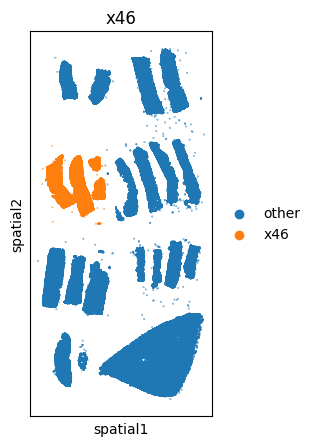

In [193]:
sample = 'x46'
x0, x1, y0, y1  = bounds_dict[f'slide_{slide}']['bounds'][sample]

sample_bin = [sample if xy_check(x, y) else 'other' for x,y in zip(adata.obs['x_centroid'], adata.obs['y_centroid'])]
adata.obs[sample] = sample_bin

fig, ax = plt.subplots(figsize=(5, 5)) 
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        sample,
    ],
    wspace=0.1,
    size=0.1,
    ax=ax
)
adata.uns.pop(f'{sample}_colors');

In [194]:
slide_info = {
    'slide2file'  : slide2file,
    'sample_info' : bounds_dict
}

with open("annotations/slides_patients_annotation.json", 'w') as file:
    json.dump(slide_info, file)